<a href="https://colab.research.google.com/github/ingrid1017/Parcial1Simulacion/blob/main/RetropropagacionEnPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Paso 1: Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # Capa oculta
        self.fc2 = nn.Linear(5, 2)   # Capa de salida

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [2]:
# Paso 2: Inicialización de componentes
model = SimpleNN()
criterion = nn.CrossEntropyLoss()  # Función de pérdida de entropía cruzada
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Paso 3: Generar datos de entrenamiento
inputs = torch.randn(100, 10)
# Etiquetas
labels = torch.randint(0, 2, (100,))

Epoch [1/10], Loss: 0.7047
Epoch [2/10], Loss: 0.7041
Epoch [3/10], Loss: 0.7034
Epoch [4/10], Loss: 0.7028
Epoch [5/10], Loss: 0.7021
Epoch [6/10], Loss: 0.7015
Epoch [7/10], Loss: 0.7008
Epoch [8/10], Loss: 0.7002
Epoch [9/10], Loss: 0.6996
Epoch [10/10], Loss: 0.6989


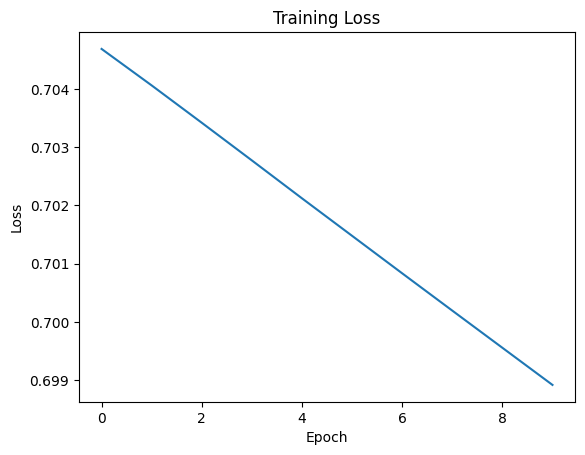

In [6]:
# Paso 4: Entrenamiento y visualización
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Almacenar la pérdida
    losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualización de la pérdida durante el entrenamiento
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()